In [1]:
import xarray as xr
import numpy as np
import datetime
def data_ones(x):
    x_new=x/x
    x_new=x_new.fillna(0)
    return x_new

In [3]:
#make oscar climatology
#dir_data='F:/data/sat_data/oscar/L4/oscar_third_deg/'
dir_clim='F:/data/sat_data/oscar/L4/oscar_third_deg/climatology/'
dir_data = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/oscar/preview/L4/oscar_third_deg/'
for lyr in range(1993,2018):
    filename = dir_data + 'oscar_vel' + str(lyr).zfill(4) + '.nc.gz'
    ds=xr.open_dataset(filename,drop_variables=['um','vm'])
    ds_count=data_ones(ds)
    #in order to add up the data the time arrays have to be aligned otherwise xarray doesn't know what to do with it
    ds['time'] = ds['time'] - np.datetime64(lyr,'Y')
    ds_count['time'] = ds_count['time'] - np.datetime64(lyr,'Y')
    if lyr==1993:
        ds2=ds.fillna(0)
        ds_count2=ds_count.fillna(0)
        ds_summer=ds2
        ds_counter = ds_count2
    else:
        ds2 = ds.interp_like(ds_summer.time)
        ds_count2 = ds_count.interp_like(ds_summer.time)
        ds2=ds2.fillna(0)
        ds_count2=ds_count2.fillna(0)
        ds_summer=ds_summer + ds2
        ds_counter = ds_counter + ds_count2
    print(lyr)
    print(ds.u.shape)
    print(ds_summer.u.shape)
   # print(ds_counter.u.shape)
   # print(ds.u.shape)
   # print(ds.time.data[0:20])
ds_ave = ds_summer / ds_counter
ds_ave.to_netcdf(dir_clim + 'oscar_v2009_1993_2016_climatology_12202118.nc')

1993
(72, 1, 481, 1201)
(72, 1, 481, 1201)
1994
(72, 1, 481, 1201)
(72, 1, 481, 1201)
1995
(72, 1, 481, 1201)
(72, 1, 481, 1201)
1996
(72, 1, 481, 1201)
(72, 1, 481, 1201)
1997
(72, 1, 481, 1201)
(72, 1, 481, 1201)
1998
(72, 1, 481, 1201)
(72, 1, 481, 1201)
1999
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2000
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2001
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2002
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2003
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2004
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2005
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2006
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2007
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2008
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2009
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2010
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2011
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2012
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2013
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2014
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2015
(72, 1, 481, 1201)
(72, 1, 481, 1201)
2016
(72, 1

In [12]:
ds_ave

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 481, longitude: 1201, time: 72, year: 0)
Coordinates:
  * year       (year) float64 
  * time       (time) timedelta64[ns] -79016 days +22:43:41.128654 ... -78657 days +22:43:41.128654
  * depth      (depth) float32 15.0
  * latitude   (latitude) float64 80.0 79.67 79.33 79.0 ... -79.33 -79.67 -80.0
  * longitude  (longitude) float64 20.0 20.33 20.67 21.0 ... 419.3 419.7 420.0
Data variables:
    u          (time, depth, latitude, longitude) float64 nan nan ... nan nan
    v          (time, depth, latitude, longitude) float64 nan nan ... nan nan

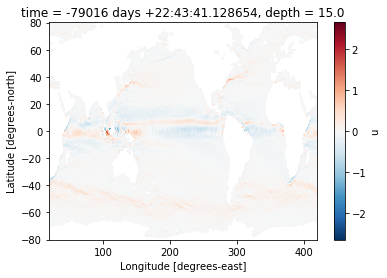

In [15]:
ds_ave.u[0,0,:,:].plot()


<xarray.DataArray 'u' (time: 72, depth: 1, latitude: 481, longitude: 1201)>
array([[[[0., ..., 0.],
         ...,
         [0., ..., 0.]]],


       ...,


       [[[0., ..., 0.],
         ...,
         [0., ..., 0.]]]])
Coordinates:
  * time       (time) timedelta64[ns] -79017 days +22:43:41.128654 ... -78658 days +22:43:41.128654
  * depth      (depth) float32 15.0
  * latitude   (latitude) float64 80.0 79.67 79.33 79.0 ... -79.33 -79.67 -80.0
  * longitude  (longitude) float64 20.0 20.33 20.67 21.0 ... 419.3 419.7 420.0
Attributes:
    units:      meter/sec
    long_name:  Ocean Surface Zonal Currents

In [67]:
#year after leap year, the days are all +1
#for i in range(0,73):
#    print(ds2.time[i].data + np.datetime64(1995,'Y'), ds_counter.time[i].data + np.datetime64(1995,'Y'))
#    print(ds.u[0,0,200,600].data,ds2.u[0,0,200,600].data,ds.u[1,0,200,600].data)


1995-01-02T00:00:00.000000000 1995-01-02T00:00:00.000000000
0.014016411267220974 0.01081351232714951 -0.001998083433136344
1995-01-07T00:00:00.000000000 1995-01-07T00:00:00.000000000
0.014016411267220974 0.01081351232714951 -0.001998083433136344
1995-01-12T00:00:00.000000000 1995-01-12T00:00:00.000000000
0.014016411267220974 0.01081351232714951 -0.001998083433136344
1995-01-17T00:00:00.000000000 1995-01-17T00:00:00.000000000
0.014016411267220974 0.01081351232714951 -0.001998083433136344
1995-01-22T00:00:00.000000000 1995-01-22T00:00:00.000000000
0.014016411267220974 0.01081351232714951 -0.001998083433136344
1995-01-27T00:00:00.000000000 1995-01-27T00:00:00.000000000
0.014016411267220974 0.01081351232714951 -0.001998083433136344
1995-02-01T00:00:00.000000000 1995-02-01T00:00:00.000000000
0.014016411267220974 0.01081351232714951 -0.001998083433136344
1995-02-06T00:00:00.000000000 1995-02-06T00:00:00.000000000
0.014016411267220974 0.01081351232714951 -0.001998083433136344
1995-02-11T00:00

IndexError: index 72 is out of bounds for axis 0 with size 72

In [26]:
ds

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 481, longitude: 1201, time: 72, year: 72)
Coordinates:
  * time       (time) timedelta64[ns] 0 days 5 days ... 354 days 359 days
  * year       (year) float32 1993.0 1993.0137 1993.0273 ... 1993.9698 1993.9835
  * depth      (depth) float32 15.0
  * latitude   (latitude) float64 80.0 79.67 79.33 79.0 ... -79.33 -79.67 -80.0
  * longitude  (longitude) float64 20.0 20.33 20.67 21.0 ... 419.3 419.7 420.0
Data variables:
    u          (time, depth, latitude, longitude) float64 0.0 0.0 ... 0.0 0.0
    v          (time, depth, latitude, longitude) float64 0.0 0.0 ... 0.0 0.0
Attributes:
    VARIABLE:       Ocean Surface Currents
    DATATYPE:       1/72 YEAR Interval
    DATASUBTYPE:    unfiltered
    GEORANGE:       20 to 420 -80 to 80
    PERIOD:         Jan.01,1993 to Dec.26,1993
    year:           1993
    description:    OSCAR Third Degree Sea Surface Velocity
    CREATION_DATE:  15:59 04-Apr-2017
    version:        2017.0
    sour

array(['1993-01-01T00:00:00.000000000', '1993-01-06T00:00:00.000000000',
       '1993-01-11T00:00:00.000000000', '1993-01-16T00:00:00.000000000',
       '1993-01-21T00:00:00.000000000', '1993-01-26T00:00:00.000000000',
       '1993-01-31T00:00:00.000000000', '1993-02-05T00:00:00.000000000',
       '1993-02-10T00:00:00.000000000', '1993-02-15T00:00:00.000000000',
       '1993-02-20T00:00:00.000000000', '1993-02-25T00:00:00.000000000',
       '1993-03-02T00:00:00.000000000', '1993-03-07T00:00:00.000000000',
       '1993-03-12T00:00:00.000000000', '1993-03-18T00:00:00.000000000',
       '1993-03-23T00:00:00.000000000', '1993-03-28T00:00:00.000000000',
       '1993-04-02T00:00:00.000000000', '1993-04-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [112]:
print(ds_ave.u.shape)
print(ds.u.shape)
print(ds_count.u.shape)
print(ds_summer.u.shape)
print(ds_counter.u.shape)

(0, 1, 481, 1201)
(72, 1, 481, 1201)
(72, 1, 481, 1201)
(0, 1, 481, 1201)
(0, 1, 481, 1201)


RuntimeError: NetCDF: Invalid argument

In [91]:
#check that time all the same, even leap years
for lyr in range(1993,2018):
    filename = dir_cmc + 'oscar_vel' + str(lyr).zfill(4) + '.nc'
    ds=xr.open_dataset(filename,drop_variables=['um','vm'])
    print(ds.time[12].data)

1993-03-02T00:00:00.000000000
1994-03-02T00:00:00.000000000
1995-03-02T00:00:00.000000000
1996-03-02T00:00:00.000000000
1997-03-02T00:00:00.000000000
1998-03-02T00:00:00.000000000
1999-03-02T00:00:00.000000000
2000-03-02T00:00:00.000000000
2001-03-02T00:00:00.000000000
2002-03-02T00:00:00.000000000
2003-03-02T00:00:00.000000000
2004-03-02T00:00:00.000000000
2005-03-02T00:00:00.000000000
2006-03-02T00:00:00.000000000
2007-03-02T00:00:00.000000000
2008-03-02T00:00:00.000000000
2009-03-02T00:00:00.000000000
2010-03-02T00:00:00.000000000
2011-03-02T00:00:00.000000000
2012-03-02T00:00:00.000000000
2013-03-02T00:00:00.000000000
2014-03-02T00:00:00.000000000
2015-03-02T00:00:00.000000000
2016-03-02T00:00:00.000000000
2017-03-02T00:00:00.000000000


In [93]:
ds_counter

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 481, longitude: 1201, time: 72, year: 72)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01 1993-01-06 ... 1993-12-26
  * year       (year) float32 1993.0 1993.0137 1993.0273 ... 1993.9698 1993.9835
  * depth      (depth) float32 15.0
  * latitude   (latitude) float64 80.0 79.67 79.33 79.0 ... -79.33 -79.67 -80.0
  * longitude  (longitude) float64 20.0 20.33 20.67 21.0 ... 419.3 419.7 420.0
Data variables:
    u          (time, depth, latitude, longitude) float64 0.0 0.0 ... 0.0 0.0
    v          (time, depth, latitude, longitude) float64 0.0 0.0 ... 0.0 0.0
    um         (time, depth, latitude, longitude) float64 0.0 0.0 ... 0.0 0.0
    vm         (time, depth, latitude, longitude) float64 0.0 0.0 ... 0.0 0.0

In [89]:
ds.time[12].data

numpy.datetime64('1994-03-02T00:00:00.000000000')

<xarray.DataArray 'u' ()>
array(0.028033)
Coordinates:
    time       datetime64[ns] 1995-01-01
    depth      float32 15.0
    latitude   float64 13.33
    longitude  float64 220.0 <xarray.DataArray 'u' ()>
array(0.014016)
Coordinates:
    time       datetime64[ns] 1995-01-01
    depth      float32 15.0
    latitude   float64 13.33
    longitude  float64 220.0
Attributes:
    units:      meter/sec
    long_name:  Ocean Surface Zonal Currents <xarray.DataArray 'u' ()>
array(1.)
Coordinates:
    time       datetime64[ns] 1995-01-01
    depth      float32 15.0
    latitude   float64 13.33
    longitude  float64 220.0
<xarray.DataArray 'u' ()>
array(nan)
Coordinates:
    time       datetime64[ns] 1995-01-01
    depth      float32 15.0
    latitude   float64 13.33
    longitude  float64 20.0 <xarray.DataArray 'u' ()>
array(nan)
Coordinates:
    time       datetime64[ns] 1995-01-01
    depth      float32 15.0
    latitude   float64 13.33
    longitude  float64 20.0
Attributes:
    units:   

In [12]:
    clim_sum=clim_sum+ds.analysed_sst.data
    clim_cnt=clim_cnt+1
    #print(clim_sum[0,1,1],clim_sum[0,400,900])
    #print(clim_cnt[0,1,1],clim_cnt[0,400,900])
clim_sum=clim_sum/clim_cnt
    #print(clim_sum[0,1,1],clim_sum[0,400,900])
fname_tem='clim1993_2016' + sjdy + '-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0a.nc'
cmc_filename2 = dir_cmc_clim + fname_tem
foo = xr.DataArray(clim_sum, coords=[ds.time, ds.lat, ds.lon], dims=['time', 'lat', 'lon'])
foo.to_netcdf(cmc_filename2)
foo = xr.DataArray(clim_sum, coords=[ds.time, ds.lat, ds.lon], dims=['time', 'lat', 'lon'])
clim_sum.setncatts=ds.analysed_sst.attrs



AttributeError: 'numpy.ndarray' object has no attribute 'setncatts'